# Introduction

Crime is a major concern for families and individuals in Pittsubrugh, as well as worldwide. However, we believe that educating the masses through exposure is the most optimal procedure in order to create the safest neighborhoods. Through gracious volunteer work from knowledgeable members of the community, a better understanding of crime itself and how to avoid it will surely foster. It is a common line of thinking that police officers would be primarily responsibly for this community wide exposure therapy. Of course, the best information revolving around crime comes straight from the horse's mouth, or in this case the criminal's! Criminals have first hand experience with breaking the law and illegal activities, making them prime candidates to educate the next generation on what *not* to do. Therefore, the safest neighborhoods will be the neighborhoods must be the ones with the highest criminal activity, as the heightened awareness and potential teaching opportunities will create a positive feedback loop.

# Our Metric

We believe that the "best" neighborhood is the one that has the current highest and highest historic crime rate, as well as the most capable criminals. 

We used the following datasets:

[Pittsburgh Police Arrest Data](https://data.wprdc.org/dataset/arrest-data)
NEED OTHER LINKS thx
[Pittsburgh 

## Recorded Arrests By Neighborhood

,Neighborhood,Total Recorded Arrests
0,Central Business District,2131
1,South Side Flats,1953
2,Not Recorded,1361
3,Carrick,1313
4,East Allegheny,1235
5,Homewood South,1138
6,Homewood North,1036
7,East Liberty,995
8,Marshall-Shadeland,853
9,Mount Washington,838


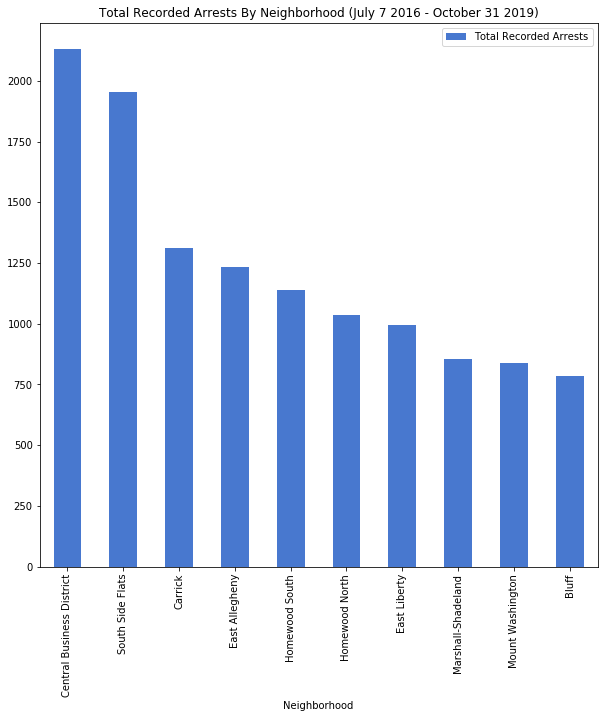

In [18]:

# import all of the necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

arrests = pd.read_csv("recordedArrests.csv").fillna("Not Recorded") # replace all entries with NaN with "Not Recorded"

onlyArrests = { "Total Recorded Arrests" : arrests["INCIDENTNEIGHBORHOOD"].value_counts()} # read the original dataframe and create a new one only containing the informaion we need. 
# value_counts() returns a series object of the total number of times each object appears in a column, in this case it counts every time a neighborhood name is recorded



newDataFrame = pd.DataFrame(onlyArrests # create a new data frame from the onlyArrests dataframe
                           ).reset_index( # reset the index so that the list of names can be given a collective title
                                ).rename(columns = {"index":"Neighborhood"}) # rename the original index column to "Neighborhood"

# Change the style of the graph
plt.style.use('seaborn-muted')

# Display the top 10 neighborhoods with the most recorded arrests as a bar graph
newDataFrame.set_index("Neighborhood" # Essentially undoes the reset_index done above, but now the index column has a proper title
                      ).drop(["Not Recorded"] # Remove the category where no neighborhood was recorded in the data
                            ).nlargest(10, "Total Recorded Arrests" # Take the 10 rows with the largest "Total Recorded Arrests" values, in this case it's the top 10 neighborhoods with the most crimes
                                      ).plot(kind = "bar", title = "Total Recorded Arrests By Neighborhood (July 7 2016 - October 31 2019)", figsize = (10,10)) # plot the data. figsize = (x,y) determines how big the diagram will be
newDataFrame.head(50)

The graph above shows the total number of recorded arrests in each neighborhood. Ideally, a larger number suggests a high concentration of potential educators in that area. The Central Business District, or downtown area, is the location with the most arrests at 2131. The South Side Flats are second with 1952 recorded arrests. It would make sense that the busy downtown streets are crawling with the most criminals due to the high concentration of people in general, and the data reflects this. The large volume of crimes also means that there is an increased likelihood that pedestrians will witness one in progress and instantly know what not to do in the future.

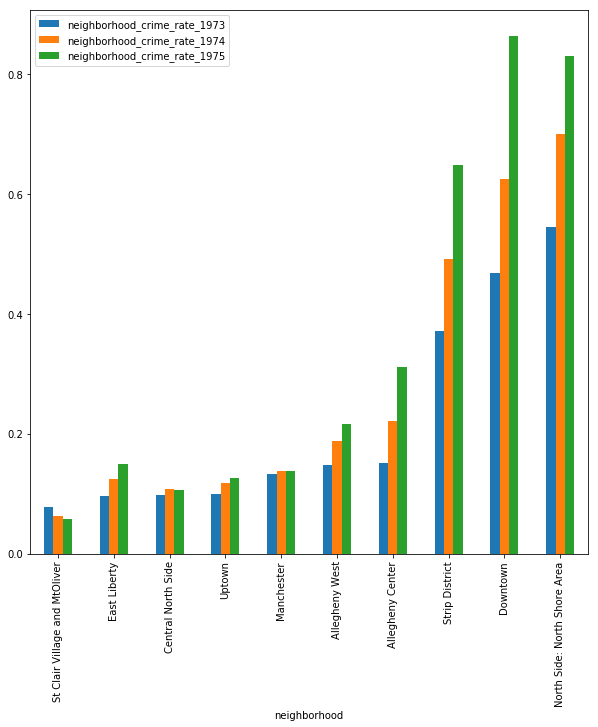

In [4]:
#import statements
import pandas as pd
import numpy as np
%matplotlib inline

#reads in data
data = pd.read_csv("Crime Rates in Pittsburgh.csv", index_col= "neighborhood")

#sorts data in increasing order of the crime rate in 1973
data_sorted_by_1973 = data.sort_values("neighborhood_crime_rate_1973")

#looks at the last ten entries showing the 10 neighborhoods with the highest crimes rates in 1973
highest_crime_rate_1973 = data_sorted_by_1973.tail(10)

#drops information about the number of major crimes and looks just at the crime rates in 1973, 1974 and 1975
rate_1973 = highest_crime_rate_1973.drop(["number_major_crimes_1973", "number_major_crimes_1974","number_major_crimes_1975"], axis=1 )

#plots this data as a bar graph
rate_1973.plot.bar(figsize = (10,10))

This graph shows the top 10 neighborhoods with the highest crime rates. It shows these neighborhoods crime rates in the years 1973, 1974 and 1975. The neighborhoods' with the highest crime rates, would indicate a larger number of criminals who would be able to teach the younger generations what NOT to do. Based on the bar graph, Downtown and the North Side: North Shore Area have had the highest crime rates. The North Side had a higher crime rate than Downtown in 1973 and 1974. Whereas, Downtown had a higher crime rate in 1975. 

# Our Conclusions

Derek: I spent a large portion of my childhood in Greenfield, so I suppose that would be my favorite neighborhood if I had to pick one. It was ranked 44th in recorded crimes, with a total of 279, which is a fraction of the Downtown's total at 2131. Of course, Downtown is much busier and noisier than the Greenfield suburbs. There's also a distinct lack of pets in the Downtown area out and about. There are many streets in Greenfield where many cats and dogs freely roam the quiet streets, and I was always on the lookout for them growing up. I'm not sure if this is a fair tradeoff for being well educated on crime or not as Downtown is clearly winning in that regard.

Sherryl: Based on crime rates, Downtown has had the highest crime rate from all of the data when it hit around 0.85 in 1975. Though, the North Side: North Shore Area had a higher crime rate in 1973 and 1974, I think that the record high crime rate in 1975 makes it the safest neighborhoods because all these criminals can educate the younger generations on what not to do, that is not to commit crimes.